In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("driver-data.csv")

In [3]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


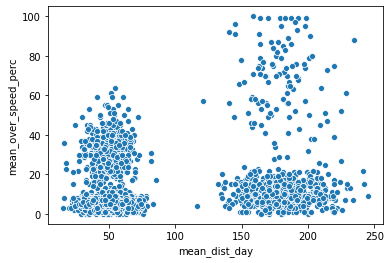

In [4]:
sns.scatterplot(df["mean_dist_day"],df["mean_over_speed_perc"])

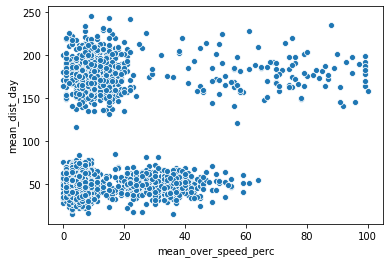

In [5]:
sns.scatterplot(df["mean_over_speed_perc"],df["mean_dist_day"])

In [6]:
x=df.iloc[:,[1,2]]

In [7]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init="k-means++")
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [8]:
wcss

[12184626.129627975,
 1316420.8509477186,
 992634.060670247,
 719601.1096991899,
 534638.2204334734,
 372825.0857382883,
 319796.81968007906,
 276929.6378480208,
 252630.4096688108,
 230001.90970764664]

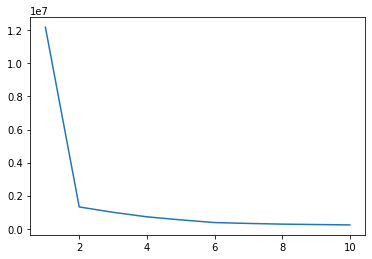

In [9]:
plt.plot(range(1,11),wcss)

In [10]:
kmeans=KMeans(n_clusters=2, init="k-means++")
y_kmeans=kmeans.fit_predict(x)

In [11]:
y_kmeans

array([0, 0, 0, ..., 1, 1, 1])

In [12]:
x["clusters"]=y_kmeans

In [13]:
y_kmeans

array([0, 0, 0, ..., 1, 1, 1])

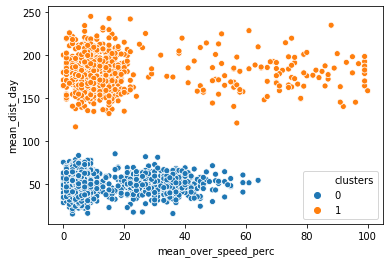

In [14]:
sns.scatterplot(df["mean_over_speed_perc"],df["mean_dist_day"],hue=x["clusters"])